In [1]:
import pandas as pd
from bioinfokit import analys, visuz


/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depre

In [2]:
df = pd.read_csv("all_genes.for_volcano.tsv",sep="\t")

In [3]:
df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName
0,1.731954e-111,0.626680,1.000,1.000,5.378238e-107,2.093933e-108,0,Gm42418
1,1.036221e-89,-0.592415,0.394,0.772,3.217778e-85,6.263959e-87,0,Gm47283
2,6.458310e-79,-0.228648,0.998,0.999,2.005499e-74,2.602699e-76,0,Rpl35a
3,3.027118e-73,-0.572587,0.970,0.994,9.400110e-69,9.149465e-71,0,Alad
4,1.415365e-63,-0.191814,0.998,1.000,4.395133e-59,3.422353e-61,0,Rpl41


In [4]:
df['tmp'] = df['avg_log2FC'].abs()

In [5]:
df = df.sort_values('tmp',ascending=False)
df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,tmp
46102,6.308730e-01,5.058064,0.103,0.081,1.000000,0.842397,14,Hbb-bs,5.058064
50455,3.558851e-01,5.009746,0.054,0.125,1.000000,0.723198,15,S100a9,5.009746
53479,2.403939e-02,3.125067,0.333,0.000,1.000000,0.611462,16,Gzma,3.125067
47591,2.869517e-08,-2.554953,0.000,0.625,0.000891,0.000167,15,Echdc2,2.554953
48762,1.237328e-01,2.523373,0.243,0.094,1.000000,0.598845,15,Lyz2,2.523373


In [6]:
df=df[~df.Cluster.isin([14,15,16])]

In [7]:
df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,tmp
24029,2.917204e-03,1.947785,0.117,0.053,1.000000e+00,5.257783e-02,9,Ighm,1.947785
25,1.778083e-34,1.882983,0.316,0.089,5.521480e-30,8.268084e-33,0,Hbb-bt,1.882983
101,6.928752e-13,1.569965,0.353,0.483,2.151585e-08,8.212609e-12,0,Hbb-bs,1.569965
1153,1.243726e-01,1.453442,0.269,0.290,1.000000e+00,1.303003e-01,0,Hba-a2,1.453442
30530,6.263600e-01,1.366851,0.284,0.292,1.000000e+00,6.861907e-01,10,Hba-a2,1.366851


In [37]:
def max_abs(x):
    return x.iloc[x.abs().values.argmax()]
def replace_best_FDR_LFC(df):
    myDict = {}
    for s,d in df.groupby("geneName"):
        myDict[s] = [d.fdr.min(),max_abs(d.avg_log2FC)]
    return pd.DataFrame.from_dict(myDict,orient="index")
df2 = replace_best_FDR_LFC(df)

In [39]:
df2.sort_values(1)

,0,1
Echdc2,1.257920e-84,-1.141771
Prtn3,6.976803e-13,-1.061232
Mpo,1.459058e-10,-1.005740
Tmsb4x,4.146422e-05,-0.950336
Lgals1,2.224273e-28,-0.869315
...,...,...
Hba-a1,4.134051e-01,1.216843
Hba-a2,1.303003e-01,1.453442
Hbb-bs,8.212609e-12,1.569965
Hbb-bt,8.268084e-33,1.882983


In [44]:
df2 = df2.reset_index()
df2.columns = ["geneName",'fdr','lfc']

df2.head()

,geneName,fdr,lfc
0,0610009B22Rik,0.000863,0.211283
1,0610009O20Rik,0.957387,-0.052948
2,0610010F05Rik,0.006530,-0.137246
3,0610010K14Rik,0.002431,0.189793
4,0610012G03Rik,0.078391,-0.155546


In [10]:
df2.shape

(8971, 9)

In [48]:
deg = df2[df2.fdr<=0.01]
deg = deg.sort_values('fdr')


In [13]:
?visuz.gene_exp.volcano

Signature:
visuz.gene_exp.volcano(
    df='dataframe',
    lfc=None,
    pv=None,
    lfc_thr=(1, 1),
    pv_thr=(0.05, 0.05),
    color=('green', 'grey', 'red'),
    valpha=1,
    geneid=None,
    genenames=None,
    gfont=8,
    dim=(5, 5),
    r=300,
    ar=90,
    dotsize=8,
    markerdot='o',
    sign_line=False,
    gstyle=1,
    show=False,
    figtype='png',
    axtickfontsize=9,
    axtickfontname='Arial',
    axlabelfontsize=9,
    axlabelfontname='Arial',
    axxlabel=None,
    axylabel=None,
    xlm=None,
    ylm=None,
    plotlegend=False,
    legendpos='best',
    figname='volcano',
    legendanchor=None,
    legendlabels=['significant up', 'not significant', 'significant down'],
    theme=None,
)
Docstring: <no docstring>
File:      ~/.conda/envs/captureC/lib/python3.8/site-packages/bioinfokit/visuz.py
Type:      function


In [24]:
df[df.geneName=="Cd74"]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,tmp
24456,0.020671,0.407161,0.520,0.439,1.0,0.124017,9,Cd74,0.407161
16565,0.000399,0.359850,0.368,0.237,1.0,0.009447,7,Cd74,0.359850
4015,0.002837,0.221700,0.488,0.402,1.0,0.012579,2,Cd74,0.221700
7964,0.058539,0.181072,0.543,0.480,1.0,0.101577,3,Cd74,0.181072


In [47]:
deg.head()

,fdr,lfc
Gm42418,2.093933e-108,0.736957
Gm47283,6.263959e-87,-0.625782
Echdc2,1.257920e-84,-1.141771
Trim12a,1.772867e-77,0.847197
Rpl35a,2.602699e-76,-0.310458


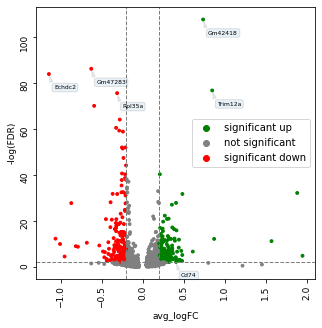

In [49]:
visuz.gene_exp.volcano(df=df2, lfc="lfc", pv="fdr", geneid="geneName", 
    genenames=({x:x for x in deg.head(n=5).geneName.tolist()+["Cd74"]}),
    gstyle=2, sign_line=True,
    show=True,lfc_thr=(0.2,0.2),pv_thr=(0.01,0.01),
    plotlegend=True,figtype="pdf",
    axylabel="-log(FDR)",
    axxlabel="avg_logFC"
                      
    )


In [50]:
visuz.gene_exp.volcano(df=df2, lfc="lfc", pv="fdr", geneid="geneName", 
    genenames=({x:x for x in deg.head(n=5).geneName.tolist()+["Cd74"]}),
    gstyle=2, sign_line=True,
    show=False,lfc_thr=(0.2,0.2),pv_thr=(0.01,0.01),
    plotlegend=True,figtype="pdf",
    axylabel="-log(FDR)",
    axxlabel="avg_logFC"
                      
    )
